## Importing the Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [13]:
df.info

<bound method DataFrame.info of         Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  F

## Selecting the rating data

In [14]:
X=df.iloc[:,8:-3]
X

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [15]:
x = X.values
x_mean = np.mean(x,axis=0)
x_n = x - np.matrix(x_mean)
x_n = x_n.T ## Converts row vectors to column vectors
print(x_n.shape)

(14, 103904)


In [16]:
C1 = np.cov(x_n)
C2 = np.corrcoef(x_n) ## Corr(x,y) = Cov(x,y)/sqrt(Var(x)*Var(y))
eig_val,eig_vec = np.linalg.eig(C1)

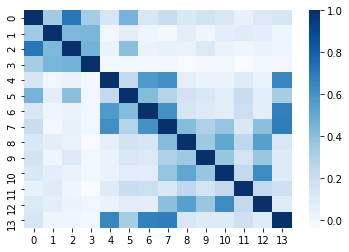

In [17]:
ax = sns.heatmap(C2,cmap='Blues')

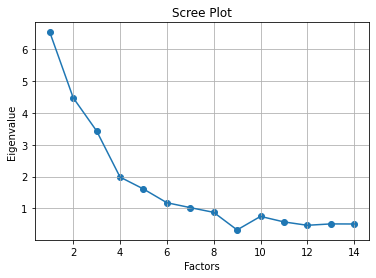

In [18]:
plt.scatter(range(1,x.shape[1]+1),eig_val)
plt.plot(range(1,x.shape[1]+1),eig_val)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [19]:
eig_sorted = np.sort(eig_val)[::-1]
arg_sort = np.argsort(eig_val)[::-1]

eig_vec_ls = []
eig_val_ls = []
imp_vec = arg_sort[:6]
for i in imp_vec:
    e_1 = eig_vec[:,i]
    lambda_1 = eig_val[i]
    eig_vec_ls.append(e_1)
    eig_val_ls.append(lambda_1)
print(eig_vec_ls)
print(eig_val_ls)

[array([0.27033179, 0.15491373, 0.21598175, 0.09124768, 0.32248111,
       0.31012556, 0.35572388, 0.42488029, 0.24281505, 0.20346816,
       0.20154101, 0.16263595, 0.20267719, 0.36360393]), array([ 0.39021937,  0.49052653,  0.51498574,  0.37850549, -0.20260897,
        0.09688795, -0.1994409 , -0.22052189, -0.06650134, -0.02366476,
       -0.04491473, -0.04552343, -0.04930291, -0.2197468 ]), array([ 0.05306717, -0.00824977,  0.07508455,  0.06404967,  0.31940211,
        0.14576517,  0.27020783,  0.0037756 , -0.4376789 , -0.36397705,
       -0.42392401, -0.16410797, -0.43174682,  0.27201769]), array([ 0.29507948, -0.55943443,  0.23840316, -0.34378726, -0.18938634,
        0.56080336, -0.04353424, -0.1367677 , -0.02140229,  0.14949426,
       -0.06588441,  0.01995804, -0.07864663, -0.14225432]), array([ 0.16085078, -0.27499485,  0.12104047,  0.15873055,  0.11669324,
       -0.24792399, -0.11317328,  0.24809807, -0.00289838,  0.23974706,
        0.04863539, -0.8039486 ,  0.05307222, -0.

In [20]:
eig_val_arr  = np.array(eig_val_ls)
lambda_1 = np.diag(eig_val_arr)
eig_vec_mat = np.matrix(eig_vec_ls).T
V = eig_vec_mat@np.sqrt(lambda_1)
print(V)

[[ 0.69070483  0.82525254  0.09831266  0.41574278  0.20419989 -0.10110342]
 [ 0.39580866  1.03738639 -0.01528359 -0.78819722 -0.34910565  0.02522343]
 [ 0.55183905  1.08911378  0.13910223  0.3358905   0.15366075 -0.02144001]
 [ 0.23314023  0.80047953  0.11865892 -0.48436805  0.20150826  0.13770203]
 [ 0.8239477  -0.42848608  0.59172685 -0.26682982  0.14814194 -0.00254635]
 [ 0.79237896  0.20490276  0.27004569  0.79012593 -0.31473922 -0.15234458]
 [ 0.90888385 -0.42178611  0.50058914 -0.06133617 -0.14367335  0.10001398]
 [ 1.08558032 -0.46636909  0.00699471 -0.19269448  0.31496022 -0.09952188]
 [ 0.62039882 -0.14063987 -0.81084737 -0.03015408 -0.00367949 -0.34234698]
 [ 0.5198665  -0.05004723 -0.67430674  0.21062515  0.30435863  0.90717761]
 [ 0.51494257 -0.09498759 -0.78536494 -0.09282572  0.06174257 -0.2177531 ]
 [ 0.41553912 -0.09627489 -0.30402772  0.02811924 -1.02061185  0.23836677]
 [ 0.51784555 -0.1042679  -0.79985753 -0.11080665  0.06737512 -0.24238308]
 [ 0.9290176  -0.46472989

In [21]:
var_ls = []
x_var = np.var(x_n,axis=1)
x_var = np.ravel(x_var)

for i in range(V.shape[0]):
    s = np.sum(np.square(np.ravel(V[i,:])))
    sig_2 = x_var[i] - s
    var_ls.append(sig_2)
var_ls = np.array(var_ls)
S = np.diag(var_ls)
print(S)

[[0.37057229 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.34899754 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.31004652 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.62891811 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.46185874 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.33181402
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.45100531 0.         0.         0.         0.         0.
  

In [24]:
C1_inv = np.linalg.inv(C1)
W = V.T@C1_inv
print(W.shape)
print(W)

(6, 14)
[[ 0.10580392  0.06063097  0.08453211  0.03571301  0.1262144   0.12137862
   0.13922513  0.16629195  0.09503427  0.07963447  0.07888021  0.06365334
   0.0793249   0.14230927]
 [ 0.18451462  0.2319447   0.2435102   0.17897573 -0.09580334  0.04581331
  -0.09430532 -0.10427343 -0.03144506 -0.01118984 -0.02123786 -0.02152568
  -0.0233128  -0.10390693]
 [ 0.02864458 -0.00445306  0.04052911  0.03457271  0.17240676  0.07868107
   0.14585269  0.00203799 -0.23625016 -0.1964674  -0.22882555 -0.08858214
  -0.23304814  0.14682961]
 [ 0.20943694 -0.39706671  0.16921011 -0.244008   -0.13441971  0.39803833
  -0.03089906 -0.09707286 -0.01519059  0.10610572 -0.04676241  0.01416551
  -0.05582059 -0.10096707]
 [ 0.12670416 -0.21661685  0.09534508  0.12503402  0.09192071 -0.1952928
  -0.08914799  0.19542992 -0.00228309  0.18885173  0.0383107  -0.63328028
   0.04180564 -0.01146245]
 [-0.08563878  0.02136529 -0.01816057  0.11663931 -0.00215687 -0.12904215
   0.08471598 -0.08429915 -0.28998204  0.768

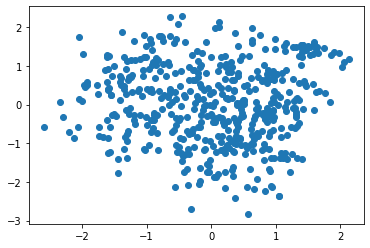

In [25]:
z = W@x_n
z1 = z.T
plt.scatter(np.ravel(z1[:500,0]),np.ravel(z1[:500,1]))
plt.show()

In [26]:
z1.shape

(103904, 6)

In [27]:
z1

matrix([[ 1.17813457, -0.77690998,  0.17824378, -0.64483538, -0.4543928 ,
         -0.77923271],
        [-1.64286334,  0.89139133, -0.56877708,  1.43258651,  1.68622541,
          1.39426445],
        [ 1.06568195, -1.37490904,  0.5429592 ,  0.37854023, -0.55056556,
         -0.65430044],
        ...,
        [-0.10159264, -1.73737597, -0.01210009, -1.23931199, -0.70372419,
         -0.38814577],
        [-1.87354186, -0.06824035, -1.3963161 , -0.10711844, -0.51719434,
          2.37843246],
        [-2.16462   ,  0.64493744, -0.26353567, -0.55229893, -1.05195685,
         -0.602094  ]])